# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import joblib
from IPython.display import display, HTML
import math

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
# Tampilkan 5 baris pertama dengan function head.
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [3]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [4]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [5]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical_columns].corr()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.024428,0.004782,-0.007397,-0.026310
CustomerAge,-0.024428,1.000000,-0.009852,0.007876,0.321161
TransactionDuration,0.004782,-0.009852,1.000000,0.030076,0.006859
LoginAttempts,-0.007397,0.007876,0.030076,1.000000,0.009088
AccountBalance,-0.026310,0.321161,0.006859,0.009088,1.000000


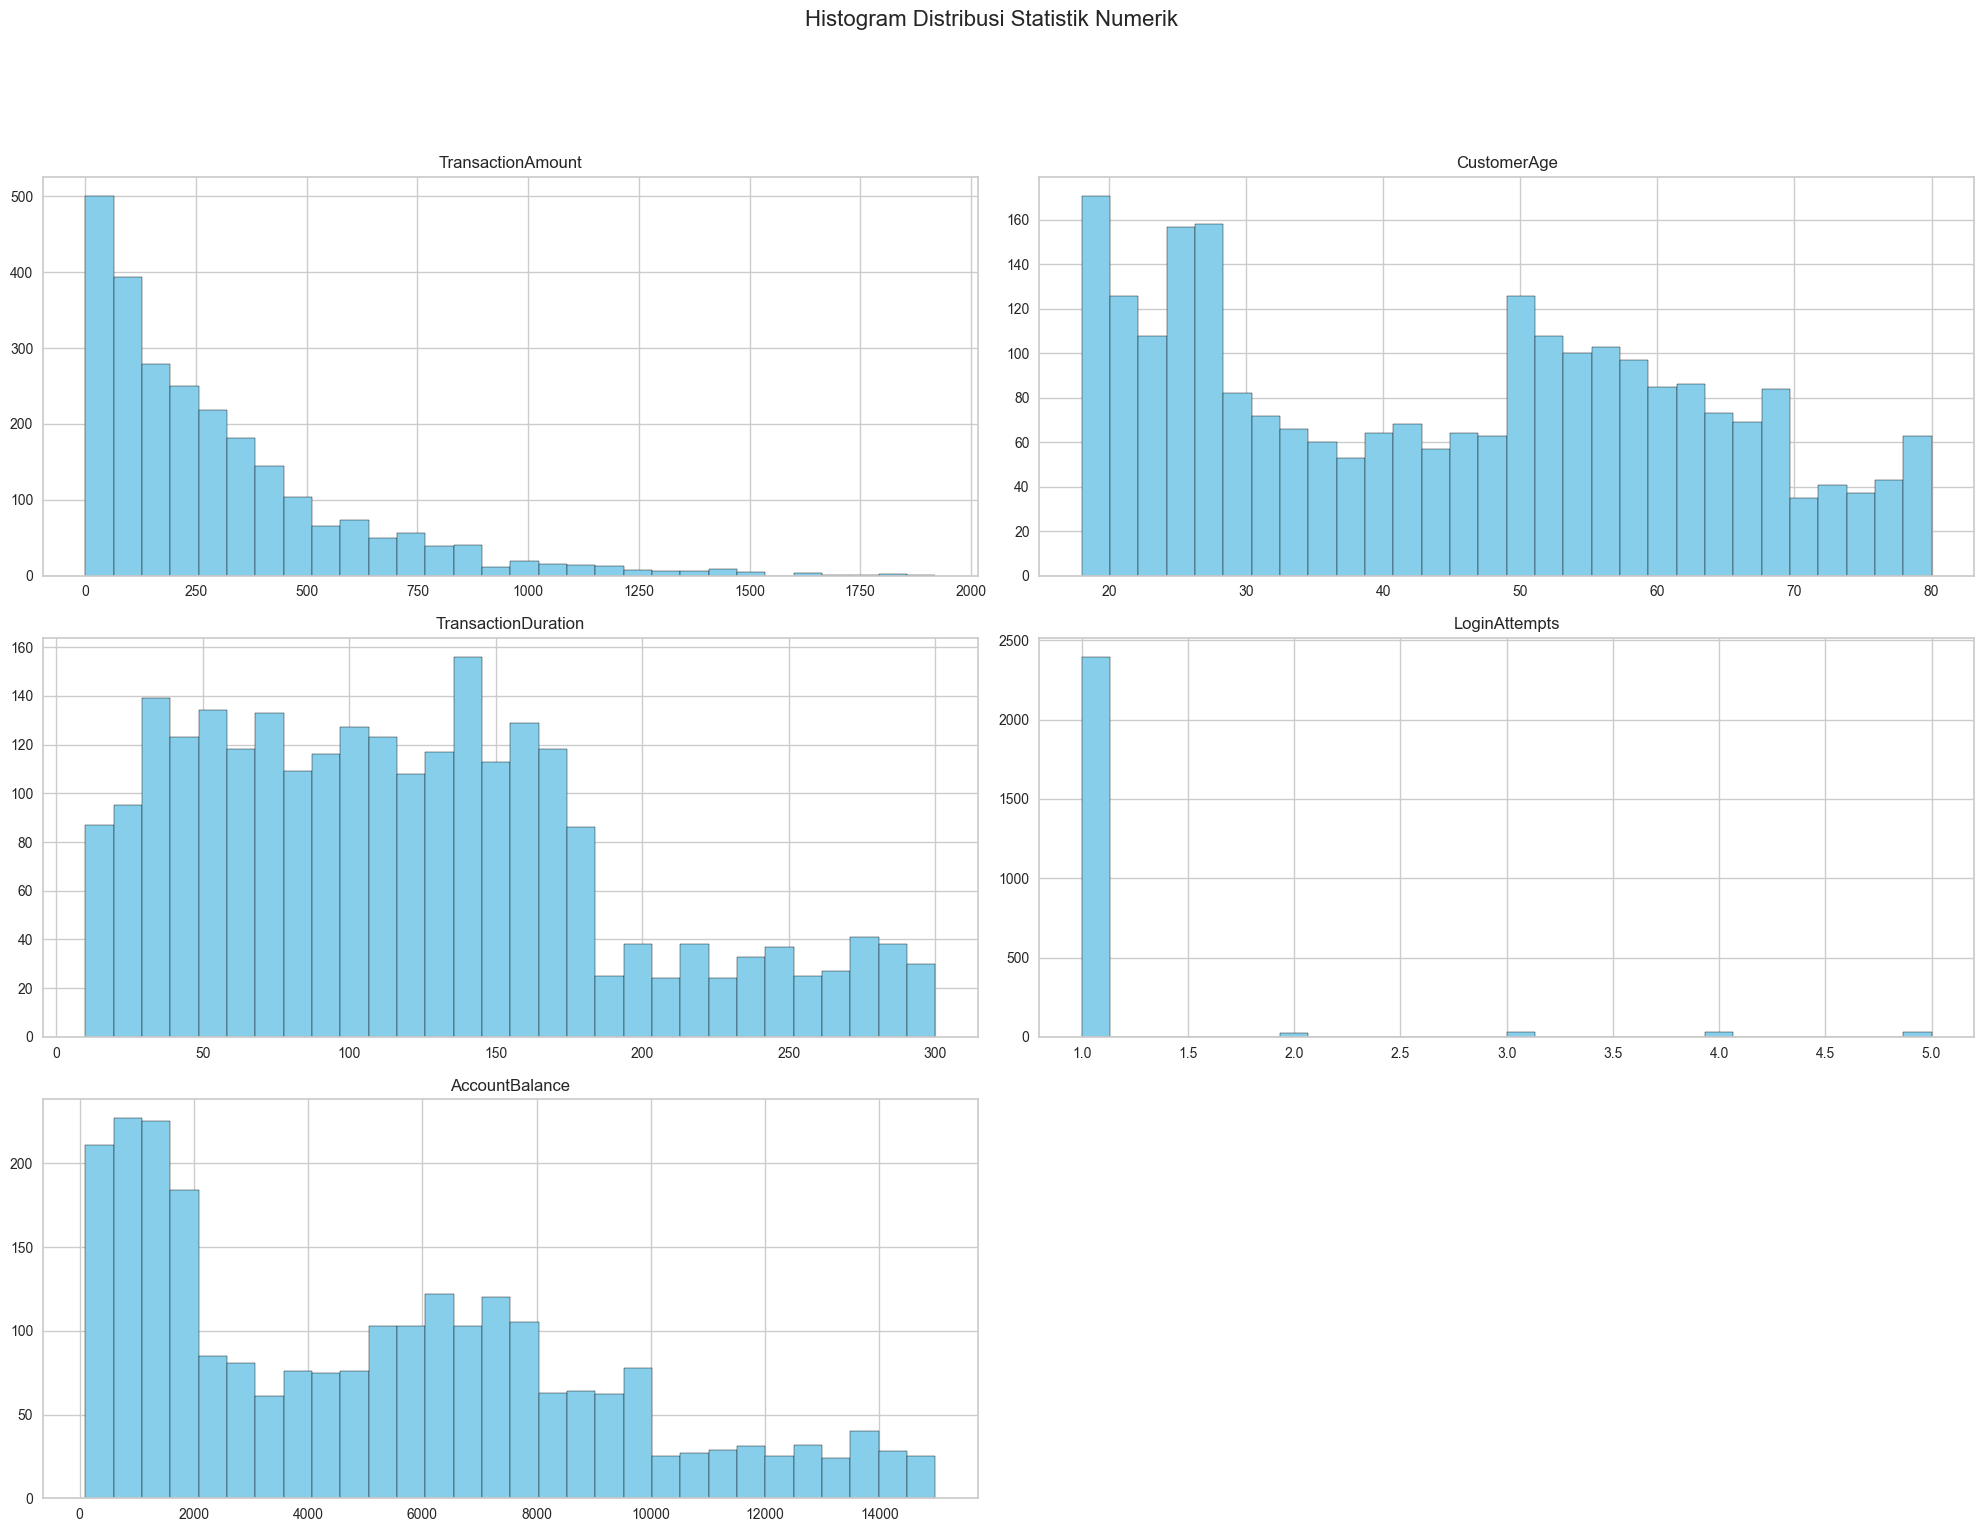

In [6]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df[numerical_columns].hist(
    figsize=(20, 15), 
    bins=30, 
    color='skyblue', 
    edgecolor='black'
)

plt.suptitle(
    'Histogram Distribusi Statistik Numerik', 
    fontsize=16, 
    y=1.02  # Menambahkan jarak antara judul dan plot
)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Memastikan tata letak tidak terpotong
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

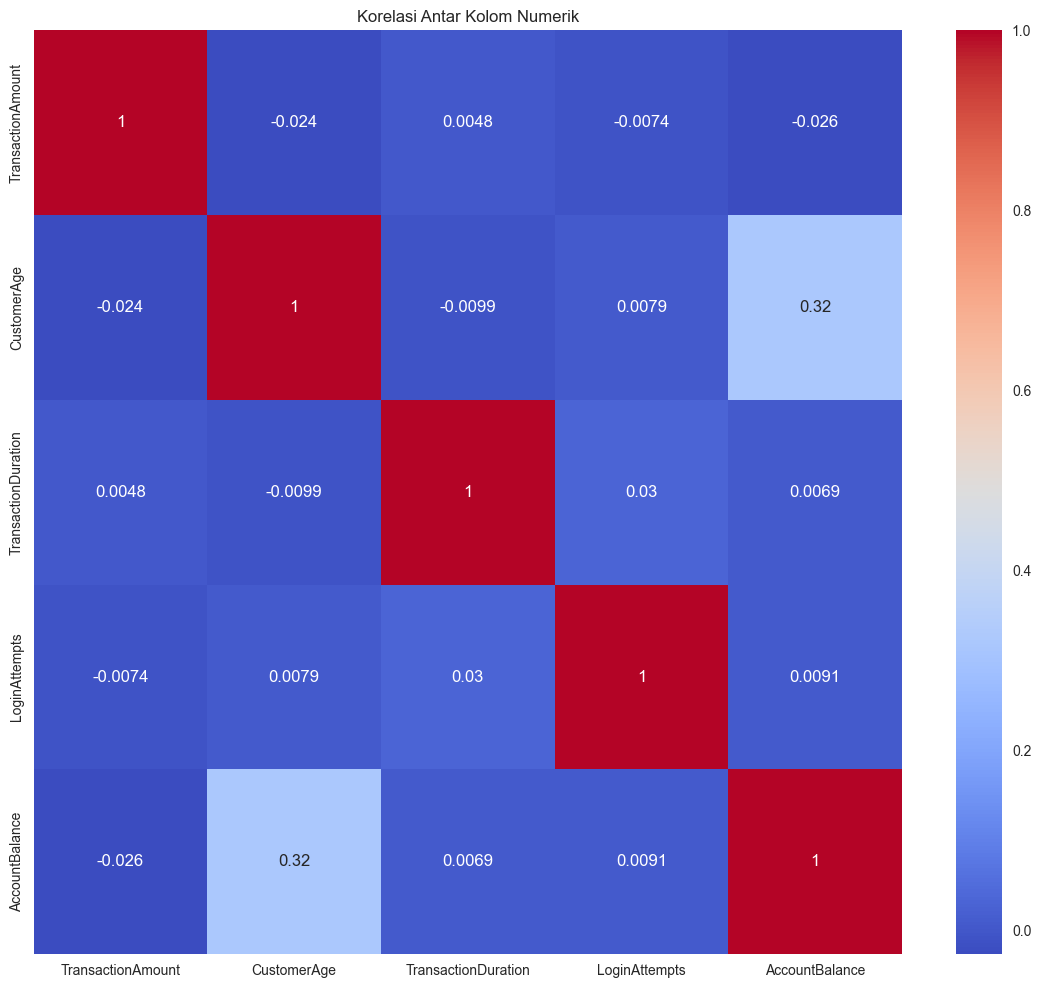

In [7]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Visualisasi correlation matrix menggunakan heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Kolom Numerik')
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [8]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [9]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

21

In [10]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
scaler = {}
for col in numerical_columns:
    scaler[col] = StandardScaler()
    df[col] = scaler[col].fit_transform(df[[col]])

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [11]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df.drop(columns=[
    col for col in df.columns if 'id' in col.lower() 
    or 'ip address' in col.lower()], 
    inplace=True)

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [12]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()

label_encoders = {}  # Buat dictionary untuk menyimpan data asli
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163
4,-0.972736,1939,0,1,2,NaN,3,1.121495,-0.204629,0.594263,16


In [13]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

Disini saya perlu melakukan pengecekan ulang pada missing values dan data duplikat dikarenakan handling missing values dan duplikat dilakukan setelah scaling dan encoding. 

In [14]:
print("Missing Values:")
print(df.isnull().sum())
print()
print(f"Data Duplikat = {df.duplicated().sum()}")

Missing Values:
TransactionAmount          26
TransactionDate             0
TransactionType             0
Location                    0
Channel                     0
CustomerAge                18
CustomerOccupation          0
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate     0
dtype: int64

Data Duplikat = 22


Disini terlihat bahwa pada fitur kategorikal tidak terdeteksi missing values, sedangkan di awal preprocessing telah dilakukan deteksi missing values bahwa terdapat missing values pada semua kolom. Hal ini disebabkan pada label encoding melakukan transform pada missing values dengan label "nan" dan merubahnya menjadi numeric. Kemudian pada data duplikat terjadi penambahan data duplikat yang seharusnya tidak diinginkan yang semula 21 menjadi 22.

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
# Untuk numerik
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].ffill())

# Untuk kategorikal, khusus untuk kategorikal dilakukan inverse sementara
for col in categorical_columns:
    le = label_encoders[col]

    # 1. inverse ke label asli (string), jadi array
    orig_labels = le.inverse_transform(df[col].astype(int))

    # 2. jadikan Series, ubah literal 'nan' (jika ada) jadi np.nan
    s = pd.Series(orig_labels, index=df.index).replace('nan', np.nan)

    # 3. imputasi missing pada label asli
    s.fillna(s.ffill(), inplace=True)

    # 4. re-encode lagi dengan encoder yang sama
    df[col] = le.transform(s.astype(str))

print(df.isnull().sum())

TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)
print(f"Duplikat: {df.duplicated().sum()}")
print(f"Dimensi data: {df.shape}")

Duplikat: 0
Dimensi data: (2514, 11)


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
for col in numerical_columns:
    # Melihat outlier dengan IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifikasi outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Mengganti outliers dengan nilai batas terdekat
    df[col] = df[col].apply(
        lambda x: lower_bound if x < lower_bound 
        else (upper_bound if x > upper_bound else x)
    )

In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03,2514.000000,2514.000000
mean,-0.042485,1241.444312,0.773667,21.018298,0.987271,-0.001686,1.507160,0.002508,-2.046294e-01,0.000999,179.175020
std,0.865123,717.718950,0.418540,12.226981,0.808233,0.997594,1.129563,0.999664,5.552219e-17,1.000481,102.976995
min,-1.017881,0.000000,0.000000,0.000000,0.000000,-1.495947,0.000000,-1.561745,-2.046294e-01,-1.286100,0.000000
25%,-0.740921,619.250000,1.000000,11.000000,0.000000,-0.991288,0.000000,-0.805299,-2.046294e-01,-0.924916,90.250000
50%,-0.294797,1241.500000,1.000000,21.000000,1.000000,0.018031,1.000000,-0.091672,-2.046294e-01,-0.096949,179.000000
75%,0.400726,1861.750000,1.000000,31.000000,2.000000,0.803056,3.000000,0.593411,-2.046294e-01,0.656689,269.000000
max,2.113197,2484.000000,1.000000,42.000000,2.000000,1.980594,3.000000,2.577295,-2.046294e-01,2.531190,359.000000


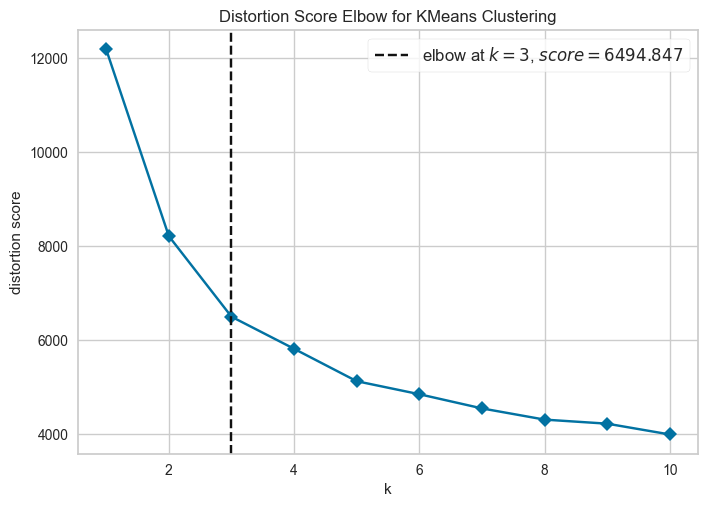

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Disini saya perlu melakukan Feature Selection terlebih dahulu untuk mereduksi fitur-fitur yang tidak relevan.
selected_features = [
    "TransactionAmount", "TransactionType", 
    "Channel", "CustomerAge", 
    "CustomerOccupation", "AccountBalance"
]
df = df[selected_features]

kmeans = KMeans(random_state=1)
visualizer = KElbowVisualizer(
    kmeans, 
    k=(1, 11), 
    timings=False
)
visualizer.fit(df)
visualizer.show()
plt.show()

In [21]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=1)
df['Cluster'] = kmeans.fit_predict(df)
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,AccountBalance,Cluster
0,-0.970546,1,0,1.419862,0,-0.000315,2
1,0.268963,1,0,1.307715,0,2.218381,0
2,-0.586526,1,2,-1.439874,3,-1.024091,1
3,-0.387294,1,2,-1.047361,3,0.886694,1
4,-0.972736,0,2,-1.047361,3,0.594263,1


Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
# import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette = silhouette_score(df, df['Cluster'])
print(f"Silhouette Score: {silhouette:.2f}")

Silhouette Score: 0.38


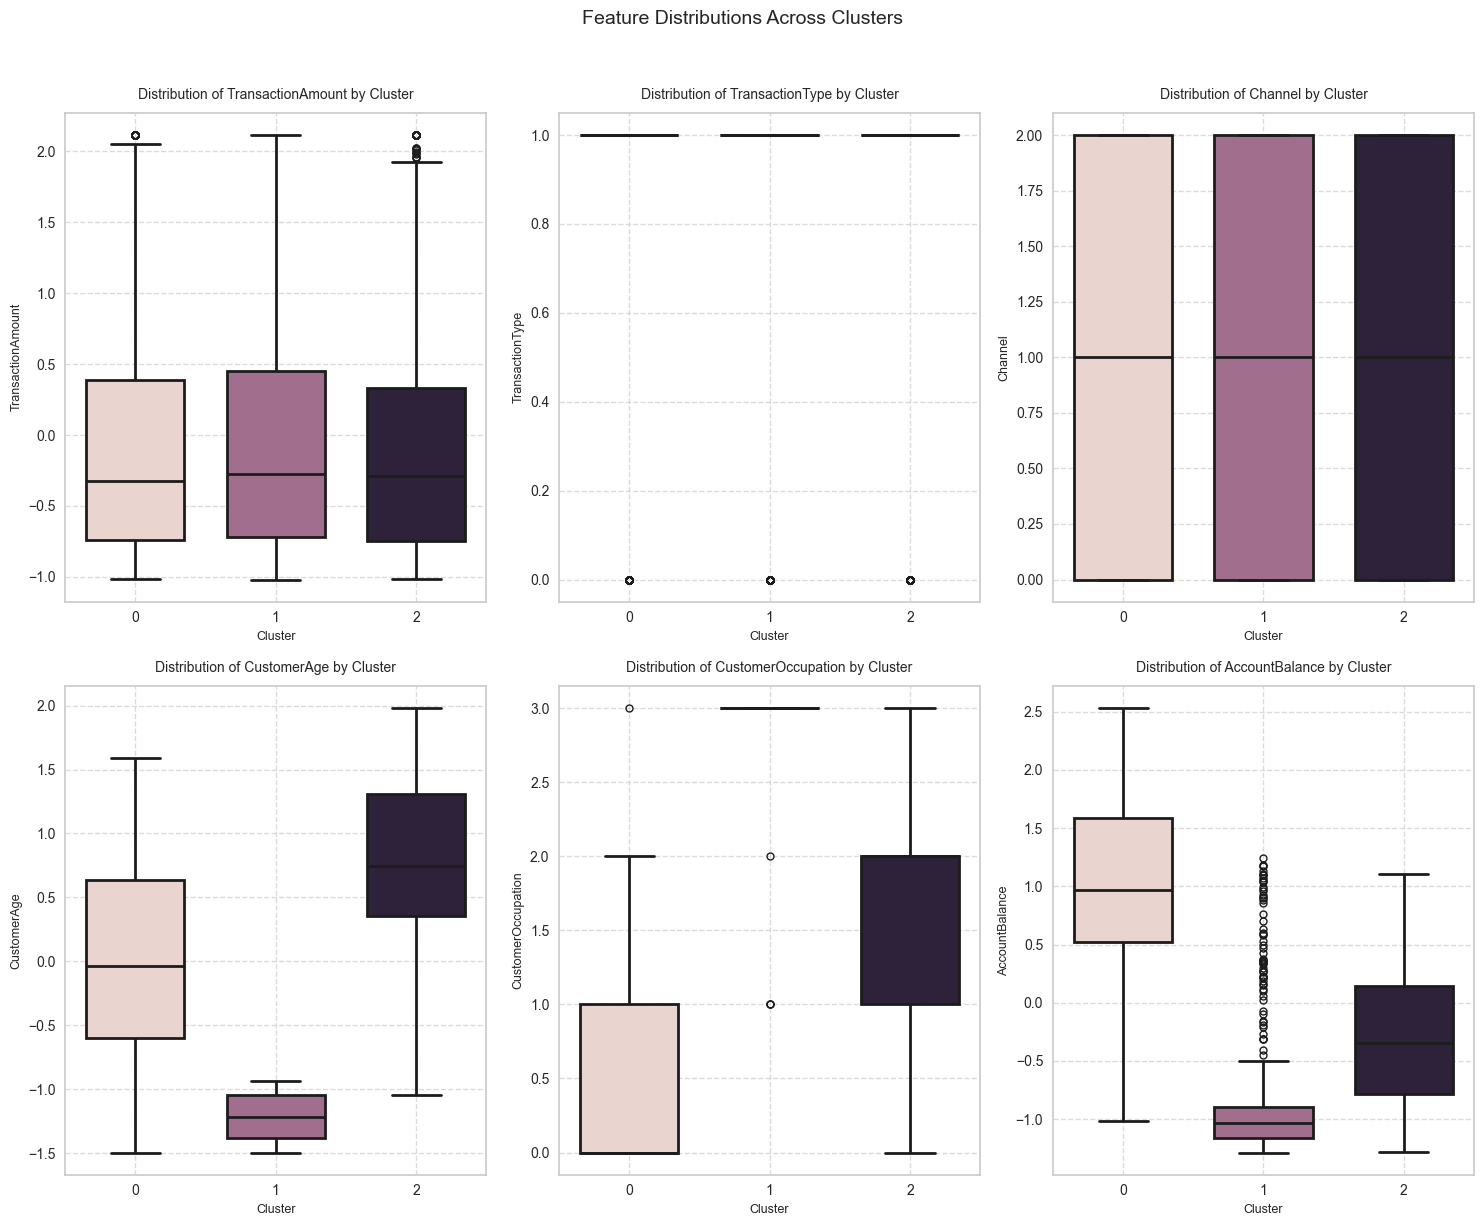

In [24]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(15, 12))

# Tentukan semua baris dan kolom
n_cols = 3
n_rows = math.ceil(len(selected_features) / n_cols)

# Looping fitur
for i, feature in enumerate(selected_features, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Buat boxplot 
    sns.boxplot(
        data=df,
        x='Cluster',
        y=feature,
        hue='Cluster',  
        legend=False,   
        width=0.7,
        fliersize=5,
        linewidth=2
    )
    
    plt.title(f'Distribution of {feature} by Cluster', fontsize=10, pad=10)
    plt.xlabel('Cluster', fontsize=9)
    plt.ylabel(feature, fontsize=9)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=0)

plt.suptitle('Feature Distributions Across Clusters', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Membangun model menggunakan PCA.

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
clusters = sorted(df['Cluster'].unique())

for cluster in clusters:
    features = df[df['Cluster'] == cluster].drop(columns='Cluster').copy()
    
    # Pada method .describe() mencakup count, mean, std, min, 25%, 50%, 75%, max
    desc_results = features.describe().round(3)

    # Tambahkan modus secara manual
    mode_row = features.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).round(3)
    desc_results.loc['mode'] = mode_row

    print(f"=== Agregasi Fitur untuk Cluster {cluster} ===")
    display(desc_results)

=== Agregasi Fitur untuk Cluster 0 ===


,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,AccountBalance
count,860.000,860.000,860.000,860.000,860.000,860.000
mean,-0.066,0.772,0.993,0.058,0.362,1.062
std,0.851,0.420,0.800,0.712,0.490,0.718
min,-1.018,0.000,0.000,-1.496,0.000,-1.017
25%,-0.742,1.000,0.000,-0.599,0.000,0.523
50%,-0.327,1.000,1.000,-0.038,0.000,0.965
75%,0.385,1.000,2.000,0.635,1.000,1.591
max,2.113,1.000,2.000,1.588,3.000,2.531
mode,2.113,1.000,1.000,-0.823,0.000,-0.040


=== Agregasi Fitur untuk Cluster 1 ===


,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,AccountBalance
count,655.000,655.000,655.000,655.000,655.000,655.000
mean,0.001,0.789,0.985,-1.212,2.989,-0.906
std,0.888,0.408,0.813,0.176,0.141,0.490
min,-1.018,0.000,0.000,-1.496,1.000,-1.286
25%,-0.719,1.000,0.000,-1.384,3.000,-1.161
50%,-0.274,1.000,1.000,-1.216,3.000,-1.034
75%,0.453,1.000,2.000,-1.047,3.000,-0.893
max,2.113,1.000,2.000,-0.935,3.000,1.244
mode,2.113,1.000,1.000,-1.103,3.000,-1.005


=== Agregasi Fitur untuk Cluster 2 ===


,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,AccountBalance
count,999.000,999.000,999.000,999.000,999.000,999.000
mean,-0.051,0.765,0.984,0.740,1.522,-0.318
std,0.862,0.424,0.813,0.731,0.648,0.554
min,-1.016,0.000,0.000,-1.047,0.000,-1.283
25%,-0.747,1.000,0.000,0.354,1.000,-0.783
50%,-0.288,1.000,1.000,0.747,2.000,-0.349
75%,0.332,1.000,2.000,1.308,2.000,0.147
max,2.113,1.000,2.000,1.981,3.000,1.105
mode,2.113,1.000,1.000,0.467,2.000,-0.783


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

Kemudian disini akan dilakukan analisis pada fitur `TransactionAmount`, `CustomerAge`, dan `AccountBalance` terlebih dahulu untuk mengetahui gambaran umum dari setiap cluster. Setelah itu dianalisis pada fitur `TransactionType`, `Channel` dan `CustomerOccupation` setelah dilakukan inverse terlebih dahulu untuk mengetahui data asli. Kemudian dilakukan interpretasi tiap cluster. 

In [28]:
# Karakteristik setiap cluster
print("Berikut karakteristik setiap cluster:")

# Looping cluster
for cluster in clusters:
    cluster_data = df[df['Cluster'] == cluster].copy()

    stats = {
        'Cluster': cluster,
        'Features': {}
    }

    for col in selected_features:
        stats['Features'][col] = {
            'Mean': cluster_data[col].mean()
        }

    display(HTML(f"<b>Cluster {cluster} Analysis:</b>"))
    display(HTML("<b>Nilai rata-rata setiap fitur:</b>"))

    # Print rata-rata untuk setiap fitur
    for feature, values in stats['Features'].items():
        print(f"- {feature} = {values['Mean']:.3f}")

    # Print interpretasi cluster
    if cluster == 0:
        display(HTML("<b>Analisis:</b>"))
        print(
"""Cluster ini memiliki jumlah transaksi yang sedang tidak lebih seperti cluster 1 atau sedikit seperti cluster 2.
Begitu pun pada `CustomerAge` yang memiliki rentang usia dewasa tidak terlalu tua dan sedikit pada usia muda.
Cluster ini sangat kaya memiliki tabungan yang sangat banyak, tidak seperti cluster 1 yang memiliki sedikit tabungan
atau cluster 2 yang memiliki tabungan yang terbilang sedang."""
)
    elif cluster == 1:
        display(HTML("<b>Analisis:</b>"))
        print(
"""Cluster ini memiliki karakteristik dengan jumlah transaksi yang cukup banyak. 
Terbilang sangat boros dikarenakan jumlah transaksi tidak diimbangi dengan jumlah tabungan yang dimiliki.
Terlihat pada fitur `TransactionAmount` dengan sebaran data tertinggi tapi pada fitur `AccountBalance` memiliki sebaran data terendah.
Cluster ini memliki rentang usia hanya anak muda pada fitur `CustomerAge`."""
)
    elif cluster == 2:
        display(HTML("<b>Analisis:</b>"))
        print(
"""Cluster ini merupakan cluster paling hemat dengan jumlah transaksi yang sedikit dan tabungan yang sedang.
Terlihat pada fitur `TransactionAmount` dengan sebaran data terendah dan pada fitur `AccountBalance` memiliki sebaran data menengah.
Cluster ini memiliki rentang usia dewasa tua pada fitur `CustomerAge`."""
)
    
    print("-" * 50)

Berikut karakteristik setiap cluster:


- TransactionAmount = -0.066
- TransactionType = 0.772
- Channel = 0.993
- CustomerAge = 0.058
- CustomerOccupation = 0.362
- AccountBalance = 1.062


Cluster ini memiliki jumlah transaksi yang sedang tidak lebih seperti cluster 1 atau sedikit seperti cluster 2.
Begitu pun pada `CustomerAge` yang memiliki rentang usia dewasa tidak terlalu tua dan sedikit pada usia muda.
Cluster ini sangat kaya memiliki tabungan yang sangat banyak, tidak seperti cluster 1 yang memiliki sedikit tabungan
atau cluster 2 yang memiliki tabungan yang terbilang sedang.
--------------------------------------------------


- TransactionAmount = 0.001
- TransactionType = 0.789
- Channel = 0.985
- CustomerAge = -1.212
- CustomerOccupation = 2.989
- AccountBalance = -0.906


Cluster ini memiliki karakteristik dengan jumlah transaksi yang cukup banyak. 
Terbilang sangat boros dikarenakan jumlah transaksi tidak diimbangi dengan jumlah tabungan yang dimiliki.
Terlihat pada fitur `TransactionAmount` dengan sebaran data tertinggi tapi pada fitur `AccountBalance` memiliki sebaran data terendah.
Cluster ini memliki rentang usia hanya anak muda pada fitur `CustomerAge`.
--------------------------------------------------


- TransactionAmount = -0.051
- TransactionType = 0.765
- Channel = 0.984
- CustomerAge = 0.740
- CustomerOccupation = 1.522
- AccountBalance = -0.318


Cluster ini merupakan cluster paling hemat dengan jumlah transaksi yang sedikit dan tabungan yang sedang.
Terlihat pada fitur `TransactionAmount` dengan sebaran data terendah dan pada fitur `AccountBalance` memiliki sebaran data menengah.
Cluster ini memiliki rentang usia dewasa tua pada fitur `CustomerAge`.
--------------------------------------------------


Hasil analisis KMeans Clustering didapatkan Silhouette Score sebesar 0.38, tetapi data ter-cluster dengan baik sesuai ekspektasi. Pada cluster 0 memliki karakteristik customer kaya dengan tabungan yang sangat banyak dan jumlah transaksi menengah. Disamping itu cluster 1 merupakan anak muda yang sangat boros dengan jumlah transaksi melebihi kemampuan tabungan mereka. Pada cluster 2 merupakan pensiunan dengan jumlah transaksi dan tabungan yang hemat. 

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [29]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df.rename(columns={'Cluster': 'Target'}, inplace=True)

In [30]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [31]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.
# Ambil data untuk numerik dan kategorikal terlebih dahulu
selected_numeric = ["TransactionAmount", "CustomerAge", "AccountBalance"]
selected_categorical = ["TransactionType", "Channel", "CustomerOccupation"]
df_inverse = df.copy()

# Untuk data numerik
for col in selected_numeric:
    df_inverse[col] = scaler[col].inverse_transform(df[[col]])

# Untuk data kategorikal
for col in selected_categorical:
    df_inverse[col] = label_encoders[col].inverse_transform(df[col].astype(int))

df_inverse.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,AccountBalance,Target
0,14.09,Debit,ATM,70.0,Doctor,5112.21,2
1,376.24,Debit,ATM,68.0,Doctor,13758.91,0
2,126.29,Debit,Online,19.0,Student,1122.35,1
3,184.50,Debit,Online,26.0,Student,8569.06,1
4,13.45,Credit,Online,26.0,Student,7429.40,1


In [32]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# Looping cluster
for cluster in clusters:
    inversed_features = df_inverse[df_inverse['Target'] == cluster].drop(columns='Target').copy()

    desc_results = inversed_features.describe(include = "all").round(3)

    print(f"=== Agregasi Fitur Numerik untuk Cluster {cluster} ===")
    display(desc_results)

    # Untuk fitur kategorikal
    print(f"=== Analisis Data Kategorikal Nilai Asli vs Hasil Encoding untuk Cluster {cluster} ===")

    #Looping fitur kategorikal
    for col in selected_categorical:
        distribution_data = []
    
        # Hitung jumlah dan proporsi tiap kategori
        value_counts = inversed_features[col].value_counts()
        proportions = inversed_features[col].value_counts(normalize=True)

        for val, count in value_counts.items():
            prop = proportions[val]
            distribution_data.append({
                'Value': val,
                'Encoded': label_encoders[col].transform([val])[0] if val in label_encoders[col].classes_ else None,
                'Count': count,
                'Proportion': f"{prop:.1%}"
            })

        df_distribution = pd.DataFrame(distribution_data)
        
        print(f"\nAnalisis kolom: {col}")
        display(df_distribution)

=== Agregasi Fitur Numerik untuk Cluster 0 ===


,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,AccountBalance
count,860.000,860,860,860.000,860,860.000
unique,NaN,2,3,NaN,4,NaN
top,NaN,Debit,Branch,NaN,Doctor,NaN
freq,NaN,664,310,NaN,552,NaN
mean,278.277,NaN,NaN,45.716,NaN,9252.311
std,248.602,NaN,NaN,12.706,NaN,2799.576
min,0.320,NaN,NaN,18.000,NaN,1149.740
25%,80.822,NaN,NaN,34.000,NaN,7151.058
50%,202.090,NaN,NaN,44.000,NaN,8873.720
75%,410.088,NaN,NaN,56.000,NaN,11312.910


=== Analisis Data Kategorikal Nilai Asli vs Hasil Encoding untuk Cluster 0 ===

Analisis kolom: TransactionType


,Value,Encoded,Count,Proportion
0,Debit,1,664,77.2%
1,Credit,0,196,22.8%



Analisis kolom: Channel


,Value,Encoded,Count,Proportion
0,Branch,1,310,36.0%
1,ATM,0,278,32.3%
2,Online,2,272,31.6%



Analisis kolom: CustomerOccupation


,Value,Encoded,Count,Proportion
0,Doctor,0,552,64.2%
1,Engineer,1,306,35.6%
2,Student,3,1,0.1%
3,Retired,2,1,0.1%


=== Agregasi Fitur Numerik untuk Cluster 1 ===


,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,AccountBalance
count,655.000,655,655,655.000,655,655.000
unique,NaN,2,3,NaN,3,NaN
top,NaN,Debit,Branch,NaN,Student,NaN
freq,NaN,517,223,NaN,651,NaN
mean,297.975,NaN,NaN,23.067,NaN,1581.376
std,259.524,NaN,NaN,3.130,NaN,1910.349
min,0.260,NaN,NaN,18.000,NaN,101.250
25%,87.720,NaN,NaN,20.000,NaN,587.115
50%,217.610,NaN,NaN,23.000,NaN,1081.790
75%,429.990,NaN,NaN,26.000,NaN,1634.405


=== Analisis Data Kategorikal Nilai Asli vs Hasil Encoding untuk Cluster 1 ===

Analisis kolom: TransactionType


,Value,Encoded,Count,Proportion
0,Debit,1,517,78.9%
1,Credit,0,138,21.1%



Analisis kolom: Channel


,Value,Encoded,Count,Proportion
0,Branch,1,223,34.0%
1,ATM,0,221,33.7%
2,Online,2,211,32.2%



Analisis kolom: CustomerOccupation


,Value,Encoded,Count,Proportion
0,Student,3,651,99.4%
1,Engineer,1,3,0.5%
2,Retired,2,1,0.2%


=== Agregasi Fitur Numerik untuk Cluster 2 ===


,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,AccountBalance
count,999.000,999,999,999.000,999,999.000
unique,NaN,2,3,NaN,4,NaN
top,NaN,Debit,Branch,NaN,Retired,NaN
freq,NaN,764,339,NaN,594,NaN
mean,282.894,NaN,NaN,57.879,NaN,3876.058
std,251.777,NaN,NaN,13.028,NaN,2159.094
min,0.840,NaN,NaN,26.000,NaN,112.760
25%,79.280,NaN,NaN,51.000,NaN,2061.610
50%,213.420,NaN,NaN,58.000,NaN,3753.240
75%,394.540,NaN,NaN,68.000,NaN,5685.930


=== Analisis Data Kategorikal Nilai Asli vs Hasil Encoding untuk Cluster 2 ===

Analisis kolom: TransactionType


,Value,Encoded,Count,Proportion
0,Debit,1,764,76.5%
1,Credit,0,235,23.5%



Analisis kolom: Channel


,Value,Encoded,Count,Proportion
0,Branch,1,339,33.9%
1,ATM,0,338,33.8%
2,Online,2,322,32.2%



Analisis kolom: CustomerOccupation


,Value,Encoded,Count,Proportion
0,Retired,2,594,59.5%
1,Engineer,1,320,32.0%
2,Doctor,0,81,8.1%
3,Student,3,4,0.4%


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

Setelah dilakukan inverse, dapat diketahui nilai asli sebelum scaling dan encoding. Dari hasil analisis inverse, sepertinya pada fitur `TransactionType` dan `Channel` kurang berpengaruh signifikan, karena setiap cluster menghasilkan karakteristik fitur yang sama. Pada fitur `TransactionType`, debit mendominasi semua cluster. Pada fitur `Channel` data terdistribusi secara merata pada semua cluster. Sehingga kemudian akan dijelaskan pada fitur `CustomerOccupation` dan ditentukan interpretasi tiap cluster. 

In [33]:
# Interpretasi hasil clustering
print("Berikut interpretasi setiap cluster:")

# Looping cluster
for cluster in clusters:
    cluster_data = df_inverse[df_inverse['Target'] == cluster].copy()

    stats = {
        'Cluster': cluster,
        'Features': {}
    }

    for col in selected_numeric:
        stats['Features'][col] = {
            'Mean': cluster_data[col].mean()
        }
    
    for col in selected_categorical:
        stats['Features'][col] = {
            'Mode': cluster_data[col].mode()[0] if not cluster_data[col].mode().empty else None
        }

    display(HTML(f"<b>Cluster {cluster} Analysis:</b>"))
    print("Nilai rata-rata setiap fitur:")

    # Print rata-rata dan modus untuk setiap fitur
    print("Mean:")
    for feature, values in stats['Features'].items():
        if 'Mean' in values:
            print(f"- {feature} = {values['Mean']:.3f}")

    print("Mode:")
    for feature, values in stats['Features'].items():
        if 'Mode' in values:
            print(f"- {feature} = {values['Mode']}")

    # Print interpretasi cluster
    if cluster == 0:
        display(HTML("<b>Interpretasi: High-Income Cluster</b>"))
        display(HTML("<b>Analisis:</b>"))
        print(
"""Sebelumnya telah dijelaskan pada cluster ini memliki karakteristik customer kaya dengan tabungan yang sangat banyak dan jumlah transaksi menengah. 
Kemudian cluster ini didominasi oleh profesi dokter dan engineer yang memiliki penghasilan tinggi pada fitur `CustomerOccupation`."""
)
    elif cluster == 1:
        display(HTML("<b>Interpretasi: High-Spending Youth Cluster</b>"))
        display(HTML("<b>Analisis:</b>"))
        print(
"""Sebelumnya telah dijelaskan pada cluster ini merupakan anak muda yang sangat boros dengan jumlah transaksi melebihi kemampuan tabungan mereka.
Cluster ini didominasi oleh profesi pelajar dan mahasiswa  pada fitur `CustomerOccupation` yang pada dasarnya belum memiliki penghasilan."""
)
    elif cluster == 2:
        display(HTML("<b>Interpretasi: Retiree Cluster</b>"))
        display(HTML("<b>Analisis:</b>"))
        print(
"""Sebelumnya telah dijelaskan pada cluster ini merupakan pensiunan dengan jumlah transaksi dan tabungan yang hemat.
Cluster ini didominasi oleh profesi pensiunan yang sudah tidak bekerja lagi dan diikuti profesi engineer."""
)
    
    print("-" * 50)

Berikut interpretasi setiap cluster:


Nilai rata-rata setiap fitur:
Mean:
- TransactionAmount = 278.277
- CustomerAge = 45.716
- AccountBalance = 9252.311
Mode:
- TransactionType = Debit
- Channel = Branch
- CustomerOccupation = Doctor


Sebelumnya telah dijelaskan pada cluster ini memliki karakteristik customer kaya dengan tabungan yang sangat banyak dan jumlah transaksi menengah. 
Kemudian cluster ini didominasi oleh profesi dokter dan engineer yang memiliki penghasilan tinggi pada fitur `CustomerOccupation`.
--------------------------------------------------


Nilai rata-rata setiap fitur:
Mean:
- TransactionAmount = 297.975
- CustomerAge = 23.067
- AccountBalance = 1581.376
Mode:
- TransactionType = Debit
- Channel = Branch
- CustomerOccupation = Student


Sebelumnya telah dijelaskan pada cluster ini merupakan anak muda yang sangat boros dengan jumlah transaksi melebihi kemampuan tabungan mereka.
Cluster ini didominasi oleh profesi pelajar dan mahasiswa  pada fitur `CustomerOccupation` yang pada dasarnya belum memiliki penghasilan.
--------------------------------------------------


Nilai rata-rata setiap fitur:
Mean:
- TransactionAmount = 282.894
- CustomerAge = 57.879
- AccountBalance = 3876.058
Mode:
- TransactionType = Debit
- Channel = Branch
- CustomerOccupation = Retired


Sebelumnya telah dijelaskan pada cluster ini merupakan pensiunan dengan jumlah transaksi dan tabungan yang hemat.
Cluster ini didominasi oleh profesi pensiunan yang sudah tidak bekerja lagi dan diikuti profesi engineer.
--------------------------------------------------


(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [34]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [35]:
# Simpan Data
df_inverse.to_csv('data_clustering_inverse.csv', index=False)